# Brief Régression logistique

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv('BriefLogistique.csv')

In [4]:
data.shape 

(400, 5)

In [5]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# le dataSet engouble 4 variables quantitatives et 1 qualitative
data.dtypes 

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
# vérifier si il y a des informations manquantes
data.isna().sum() 

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data['Gender'] = data['Gender'].astype('category').cat.codes 
# remplacer male: 0 et female : 1

In [10]:
data.describe() # les statiques rapides de base

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [11]:
data.groupby('Gender').count()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
0,204,204,204,204
1,196,196,196,196


In [12]:
data['Gender'] = data['Gender'].astype('category').cat.codes 
# remplacer male: 0 et female : 1

In [13]:
data.groupby('Purchased').count()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


## Visualisation des données

Pyplot et Seaborn, nous permettent d'avoir un aperçu rapide sur la nature des données, voir la distribution, les correlations entre les différentes variables. Nous allons commencer par voir la distribution des différents champs


<AxesSubplot:>

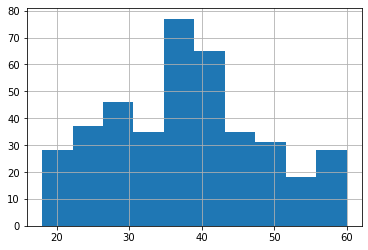

In [14]:
data['Age'].hist()

<AxesSubplot:>

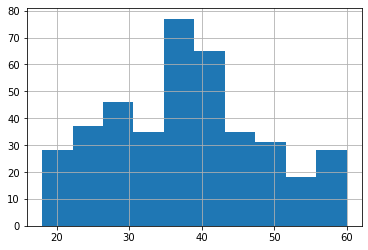

In [15]:
data['Age'].hist()

<AxesSubplot:>

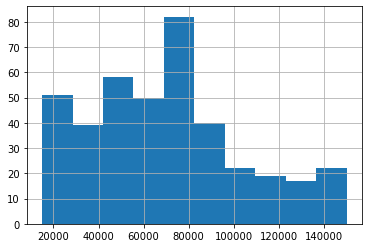

In [16]:
data['EstimatedSalary'].hist()

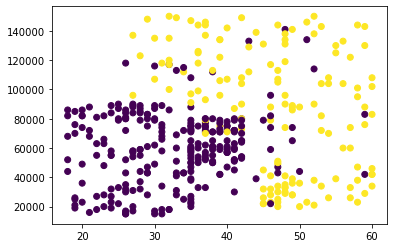

In [144]:
plt.scatter(data.Age, data.EstimatedSalary, c=data.Purchased)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

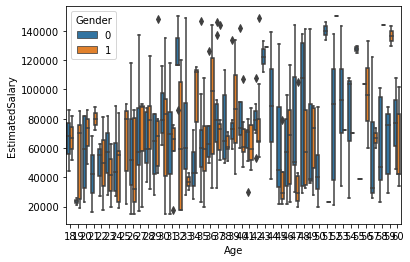

In [145]:
#
sns.boxplot(x ='Age', y ='EstimatedSalary', data = data, hue ="Gender")

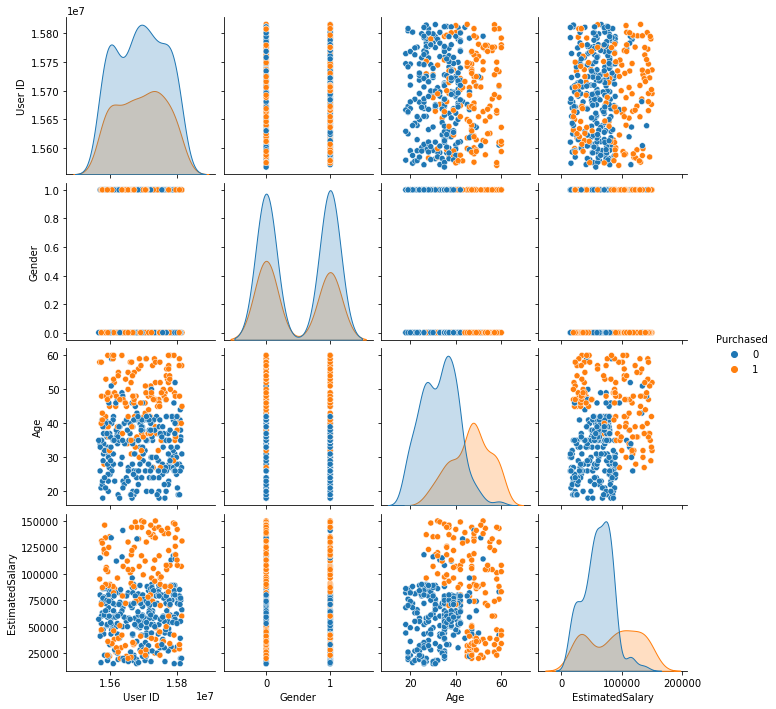

In [17]:
sns.pairplot(data, hue = "Purchased")

<AxesSubplot:>

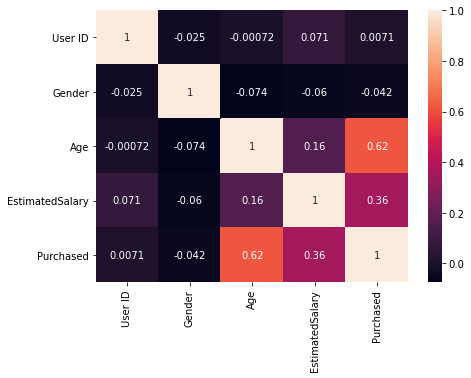

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True)

Selon ces deux graphes, le genre infulence trés peu la décision  d'acheter ou non. De même le userId, n'a aucun indicent sur cette décison. Dans la suite, nous allons procéder à leur élimination de notre data set.

In [19]:
data1 = data.drop(["User ID","Gender"], axis=1)

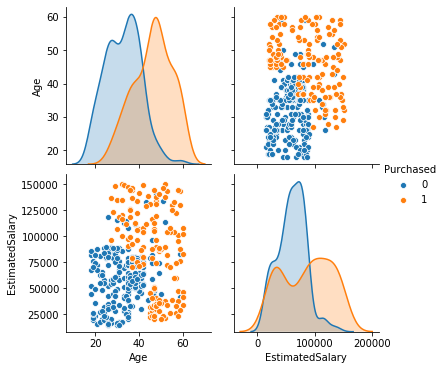

In [107]:
sns.pairplot(data1, hue = "Purchased")

<AxesSubplot:>

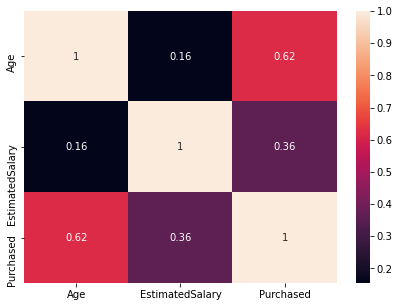

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(data1.corr(),annot=True)

Le graphe suivant indique que l'on pourrait, également, modéliser notre problème avec une regression linéaire.

/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


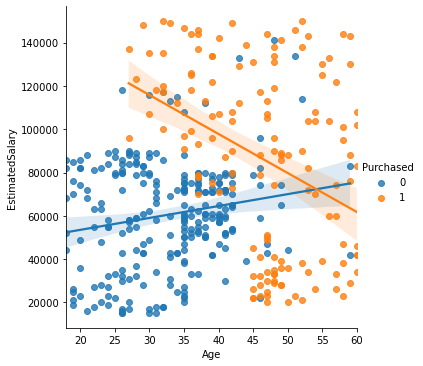

In [21]:
g = sns.lmplot("Age","EstimatedSalary",hue ='Purchased' ,data=data)
    

## La régression logistique 

L'objectif de la régression logistique est de modéliser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives.
dans notre exemple le but est de prévoir les clients potentiels y = 'Purchased' en fonction des caractéristiques disponibles X : " Age ", " EstimatedSalary".
La régression logistique appartient aux modèles linéaires généralisés. Pour rappel, il s’agit de modèles de régression qui sont des extensions du modèle linéaire, et qui reposent sur trois éléments :Modèles de régressio
        un prédicteur linéaire
        une fonction de lien
        une structure des erreurs
        
1. Les  modèles  linéaires  généralisés  
Les modèles linéaires généralisés permettent  d’étudier  la  liaison  entre  une  variable  dépendante  ou  réponse  Y et  un  ensemble de variables explicatives ou prédicteurs X1.... X , ils représentent une généralisation de la regression linéaire. le  modèle  linéaire  général(  régression  multiple, analyse de la variance et analyse de la covariance )
- le modèle linéaire 
- la régression logistique- 
- la régression de Poisson.

2. Les principaux éléments de la régression logistique (RL) :

Elle repose sur trois éléments :
- un prédicteur linéaire
- une fonction de lien
- une structure des erreurs
Dans la RL, ce n’est pas la réponse binaire (acheter /ou ne pas acheter) qui est directement modélisée, mais la probabilité de réalisation d’une des deux modalités (acheter /ou ne pas acheter). 
Cette dernière ne peut être modiliser par une droite puisque la probabilité est limitée entre 0 et 1, d'où l'importance de modiliser la probalité.
Cette dernière, est alors modélisée par une courbe sigmoïde, bornée par 0, et 1 :

Cette courbe sigmoïde est définie par la fonction logistique (fonction sigmoïde), d’équation :

f(x)=exp(x) / 1+exp(x)

f(x) = P


# Avec Sklearn

model = LogisticRegression  
model.fit(X,y)   
model.score(X,y)  
model.predict(X,y)   

In [22]:
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import MinMaxScaler
from sklearn.preproceModèles de régressiossingimport StandardScaler
from sklearn.preprocessing import RobustScaler


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [169]:
#split dataset in features and target variable
#y=data["Purchased"].values.reshape(y.shape[0],1)
y=data["Purchased"]

y.shape

(400,)

In [170]:
X = data.drop(["User ID","Gender","Purchased"], axis=1)

In [171]:
X.shape
X.head()


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [172]:
from  sklearn.model_selection import train_test_split


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.5, random_state=42)
print("Train set X : ", X_train.shape)
print("Test set  X: ", X_test.shape)

print("Train set y: ", y_train.shape)
print("Test set y: ", y_test.shape)





Train set X :  (200, 2)
Test set  X:  (200, 2)
Train set y:  (200,)
Test set y:  (200,)


In [174]:
#Normalisation des données MinMaxScaler et test_size =0.5



X_minMax = MinMaxScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_minMax,y_train)
S = model.score(X_minMax,y_train)
print("Test score  avec normalisation MinMax:", S )
print ("test_size =0.5")
print("Train score:", S )

X_testMinMax = MinMaxScaler().fit_transform(X_test)
model.fit(X_testMinMax,y_test)
S = model.predict(X_testMinMax)


Test score  avec normalisation MinMax: 0.795
test_size =0.5
Train score: 0.795


In [175]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_minMax)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testMinMax)))

Score train 0.815
Score test 0.845


In [176]:
# Standardisation des données et et test_size =0.5

X_trainSS = StandardScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_trainSS,y_train)
S = model.score(X_trainSS,y_train)
print("Test score  avec la standardisation:", S )
print ("test_size =0.5")
print("Train score:", S )

X_testSS = StandardScaler().fit_transform(X_test)
model.fit(X_testSS,y_test)
S = model.predict(X_testSS)


Test score  avec la standardisation: 0.835
test_size =0.5
Train score: 0.835


In [177]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainSS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testSS)))

Score train 0.84
Score test 0.855


# Normalisation des données 

Il est indispensable de normaliser les données quantitatives, c a d  les mettre toutes sur la même échelle ce qui permet de faciliter l'aprentissage des modèles.

Nous allons tester trois techniques :

### 1. La Normalisation MinMaxScaler

Consiste à transformer X  de telle sorte à être comprise entre 0 et 1.

Xscalde = X - X.min / (X.max - X.min)

In [178]:
#Normalisation des données MinMaxScaler et test_size =0.25

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state=42)

X_minMax = MinMaxScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_minMax,y_train)
S = model.score(X_minMax,y_train)
print("Test score  avec normalisation MinMax:", S )
print ("test_size =0.25")
print("Train score:", S )

X_testMinMax = MinMaxScaler().fit_transform(X_test)
model.fit(X_testMinMax,y_test)
S = model.predict(X_testMinMax)


Test score  avec normalisation MinMax: 0.8066666666666666
test_size =0.25
Train score: 0.8066666666666666


In [179]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_minMax)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testMinMax)))

Score train 0.7966666666666666
Score test 0.86


### 2. La standardisation : StandardScaler

La deuxième technique de normalisation est la Standardisation de tel sorte que chaque X est une moyenne nulle est un écrat type égale à 1

Xscaled = X - X.mean / X.std


In [180]:
# Standardisation des données et et test_size =0.25

X_trainSS = StandardScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_trainSS,y_train)
S = model.score(X_trainSS,y_train)
print("Test score  avec la standardisation:", S )
print ("test_size =0.25")
print("Train score:", S )

X_testSS = StandardScaler().fit_transform(X_test)
model.fit(X_testSS,y_test)
y_pred= model.predict(X_testSS)


Test score  avec la standardisation: 0.8366666666666667
test_size =0.25
Train score: 0.8366666666666667


In [181]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainSS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testSS)))

Score train 0.8466666666666667
Score test 0.9


Pour un client agé de 37 ans et avec un salaire de 67000 $, selon le modèle la réponse est négative. Le client n'achetera  (avec la standartisation)!


In [182]:
Xpred= StandardScaler().fit_transform([[37,6700]])
model.predict(Xpred)

array([0])

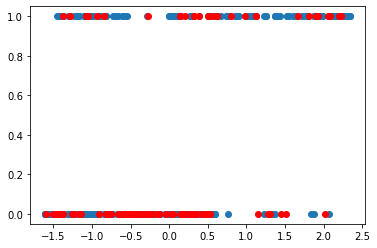

In [36]:
plt.scatter(X_trainSS[:,1], y_train)
plt.scatter(X_testSS[:,1], y_pred, c = 'r')
plt.show()

In [183]:
conf = confusion_matrix(y_test, model.predict(X_testSS))
conf

array([[60,  3],
       [ 7, 30]])

### 3. RobustScaler

Transforme chaque X en étant peu sensible aux ouliers

Xscaled = X-mediane / IQR   
Sachant que IQR = Q3-Q1


In [184]:

X_trainRS = RobustScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_trainRS,y_train)
S = model.score(X_trainRS,y_train)
print("Test score  avec RobustScaler:", S )
print ("test_size =0.25")
print("Train score:", S )

X_testRS = StandardScaler().fit_transform(X_test)
model.fit(X_testRS,y_test)
S = model.predict(X_testRS)



Test score  avec RobustScaler: 0.8333333333333334
test_size =0.25
Train score: 0.8333333333333334


In [150]:

Coef = model.coef_
intercept = model.intercept_

print(Coef)
print(intercept)



[2.55304468e-02 4.12406206e-06]
-0.8981172618731534


## Résoudre le cas d’étude présenté ci-dessous avec la librairie Scikit-Learn. 

Pour un client agé de 37 ans et avec un salaire de 67000 $, selon le modèle la réponse est négative. Le client n'achetera (normalisation selon la RobustScaler )!

In [185]:

Xpred= RobustScaler().fit_transform([[37,6700]])
model.predict(Xpred)
 

array([0])

In [186]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainRS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testRS)))

Score train 0.8333333333333334
Score test 0.9


In [187]:

from sklearn.model_selection import cross_val_score

In [188]:
cross_val_score(model, X_trainSS, y_train, cv=5)

array([0.83333333, 0.85      , 0.81666667, 0.76666667, 0.83333333])

In [189]:

print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainSS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testSS)))


Score train 0.8466666666666667
Score test 0.9


In [190]:

conf = confusion_matrix(y_test, model.predict(X_testSS))
conf


array([[60,  3],
       [ 7, 30]])

Les coefficients sur la diagonale indique les éléments bien classés, les coefficients en dehors de ceux que le classifieur a mis dans la mauvaise classe.

## Linear Regression

In [191]:
from sklearn.linear_model import LinearRegression

In [196]:
model = LinearRegression()
model.fit(X_train,y_train)
S = model.score(X_train,y_train)
print("Train score :", S )

slope = model.coef_[0]
intercept = model.intercept_
print(slope)
print(intercept)


Train score : 0.4282737636686488
0.025530446823330544
-0.8981172618731534


On remarque que la regression linéaire donne les mêmes coefs . (a et b) que la regression linéaire.

##  Résoudre le cas d’étude présenté ci-dessous avec votre propre classe python sans utiliser la librairie Scikit-Learn.


La modélisation de la probabilité 

La courbe sigmoïde est définie par la fonction logistique (fonction sigmoïde), d’équation:

f(x)= exp(x) / 1 + exp(x) = P

Ainsi:0<f(x)<1

et E(Y) = 0 ou 1

- Y suit une loi de Bernoulli de paramètre P

- Application de la transformation logit permet de travailler sur des valeurs entre 

 [-∞;+∞]:

𝑙𝑜𝑔𝑖𝑡(𝑝)= ln(𝑝/1−𝑝)

    =𝛽0 + 𝛽1𝑥𝑖1 + 𝛽2𝑥𝑖2 + ⋯ + 𝛽𝑝𝑥𝑖𝑘
          
- Interprétation des coefficients :

Soit P une probabilité, Son odds est défini par :

OddsP = P / 1- P

Cas d’une seule variable  :

Odds ratio (ou «rapport des cotes») : OR

C’est le rapport des cotes des probabilités, d’avoir la variable expliquée 'y' , avoir  par exemple une maladie pour ceux qui ont un symptôme X d’une part et de ceux qui ne l’ont pas d’autre part.

- OR=1, la variable expliquée est indépendante de la variable explicative

- OR>1, la variable expliquée est plus fréquente pour les individus qui remplissent la vairable explicative (avoir un symtôme pour une maladie).

- OR<1, la variable expliquée est plus fréquente pour les individus qui n'observent la variable expliquée (avoir un symtôme pour une maladie)


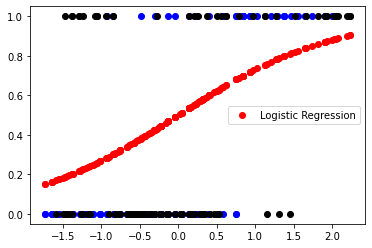

In [193]:
#Modiliser la probabilité

#P = f(x)


def fx (x):
    return np.exp(x) / (1 + np.exp(x))

sigma = fx(X_testSS)
plt.scatter (X_testSS, sigma, c= 'r', label='Logistic Regression')
plt.scatter (X_testSS[:,0], y_test, c= 'b')
plt.scatter (X_testSS[:,1], y_test, c= 'black')


plt.legend()

#   Voici un beau Z de Zorro!!!




Rester à implementer la fonction coût afin d'optimiser la classification de la classe (y =1 ) (couleur jaune) 

// http://www.josephazar.net/blog/mllogreg2.php

Le résumé de cette article, le seul que j'ai trouvais qu'il présente les concepts d'une manière compréhensible.
 
Une autre manière de présenter la régression logistique.

Nous essayons de presenter la propabilité de la manière suivante :

Nous pouvons l'écrire formellement de la manière suivante:

    P(X)=P(Y=1|X)


Soit w et x sont des vecteurs dont la taille dépend du nombre d'entités en entrée, et b est le biais scalaire.

Le modèle de régression logistique prend des entrées à valeur réelle et permet de prédire la probabilité que l'entrée appartienne à la  classe (y =1 ).

    Si P > 0.5  ===> prédiction classe (y =1 )  
    Si P > 0.5  ===> prédiction classe (y =0 )

Pour cet ensemble de données, la régression logistique a deux coefficients, tout comme la régression linéaire, par exemple:

    z(sortie) =  x * w + b


L’algorithme d’apprentissage consistera à découvrir les meilleures valeurs pour les coefficients ( w et b) en se basant sur les données d’apprentissage.

Contrairement à la régression linéaire, le résultat est transformé en probabilité en utilisant la fonction logistique:

    a = P(classe=1) = σ(z)

    a = 1 / 1+ e−z
    
- Régression logistique par descente de gradient stochastique

La descente de gradient est un algorithme d'optimisation utilisé pour trouver les valeurs de paramètres (coefficients) d'une fonction (f) qui minimise une fonction de coût (cost). 

Dans ce cas, les coefficients sont les paramètres w et b. La fonction f est notre modèle de régression logistique utilisé pour classifier les points de données. 

L'entrée de notre problème est un vecteur X avec des dimensions (n, m). m est le nombre d'observations/d'échantillons (ici 400) et n le nombre d'entités (ici 1), nous prenons une seule variable l'âge.

        X[1,400]=[[x1,x2,...,x400]]
        
        X = X_testSS[:,0]
        
Les coefficients sont initialisés à zéro:


        w[1,1] = [[0]]
        
        b = 0
 
Pour chaque échantillon de notre ensemble de données X, nous allons calculer la prédiction comme suit:

        prédiction = 1 / 1 + e−(xi * w + b)
        
Nous pouvons calculer les nouvelles valeurs de coefficient en utilisant deux équations de mise à jour simples:

    w = w − α * ( xi *  (prédiction − yi ))
    
    b = b − α * (1 * (prédiction − yi))
    
Tels:  

    α :  le taux d'apprentissage
    
    y_i : la catégorie / étiquette réelle de l'échantillon i.

Alpha est un paramètre que nous devons spécifier au début du parcours d’entraînement.

Il s’agit du taux d’apprentissage et de la mesure dans laquelle les coefficients (et donc le modèle) changent ou apprennent à chaque mise à jour.


